In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('/kaggle/input/government-labeled/labeled_water_samples_new2.csv')


In [3]:
df

,State,District,Year,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F,Water_Quality
0,Himachal Pradesh,Solan,2019,8.44,299.0,43.0,87.0,21.0,0.01,2.70,84.0,17.0,10.0,39.0,2.40,0.20,Polluted
1,Himachal Pradesh,Solan,2019,8.40,270.0,43.0,87.0,14.0,0.01,10.00,116.0,10.0,18.0,23.0,1.00,0.12,Polluted
2,Himachal Pradesh,Solan,2019,8.40,318.0,43.0,87.0,21.0,0.01,13.00,116.0,10.0,18.0,28.0,2.50,0.15,Polluted
3,Himachal Pradesh,Solan,2019,8.12,715.0,0.0,131.0,134.0,21.00,52.00,200.0,38.0,26.0,68.0,4.00,0.14,Polluted
4,Himachal Pradesh,Kangra,2019,8.12,277.0,0.0,171.0,14.0,0.01,10.00,110.0,28.0,9.7,26.0,2.01,0.22,Polluted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20199,Delhi,NEW DELHI,2020,8.40,1996.0,24.0,281.0,286.0,290.00,100.00,235.0,16.0,48.0,380.0,5.90,0.78,Polluted
20200,Delhi,WEST,2020,8.10,213.0,0.0,85.0,7.0,35.00,1.25,108.0,27.0,10.0,4.4,2.04,0.15,Polluted
20201,Delhi,NORTH EAST,2020,8.50,480.0,24.0,195.0,14.0,45.00,2.86,108.0,24.0,12.0,67.0,14.00,0.36,Polluted
20202,Delhi,WEST,2020,8.80,1250.0,48.0,293.0,139.0,130.00,20.00,147.0,20.0,24.0,240.0,5.45,1.70,Polluted


In [2]:
df.insert(0, "ID", range(1, len(df) + 1))

In [5]:
df.describe()

,ID,Year,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F
count,20204.000000,20204.000000,20204.000000,20204.000000,20204.000000,20204.000000,20204.000000,20204.000000,20204.000000,20204.000000,20204.000000,20204.000000,20204.000000,20204.000000,20204.000000
mean,10102.500000,2019.344981,7.837660,1165.011987,6.463627,268.505240,171.665659,84.345032,34.142369,306.076352,58.960264,38.986254,123.546943,12.882208,0.603002
std,5832.536755,0.475374,0.507403,1536.667586,21.085510,173.335918,394.888247,204.364890,61.621321,316.548339,61.756038,50.251111,249.225039,40.226570,0.815111
min,1.000000,2019.000000,2.200000,2.290000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,-0.160000
25%,5051.750000,2019.000000,7.540000,440.000000,0.000000,148.000000,28.000000,12.000000,4.540000,148.000000,24.000000,13.365000,23.745000,1.700000,0.190000
50%,10102.500000,2019.000000,7.860000,750.000000,0.000000,244.000000,64.000000,30.000000,17.000000,230.000000,44.000000,27.000000,53.000000,3.800000,0.400000
75%,15153.250000,2020.000000,8.130000,1295.000000,0.000000,354.000000,156.000000,72.000000,40.000000,359.000000,71.000000,46.000000,116.000000,9.355000,0.750000
max,20204.000000,2020.000000,10.500000,47670.000000,312.000000,2837.000000,16449.000000,7601.000000,1400.000000,7550.000000,1840.000000,1308.000000,9400.000000,1875.000000,27.000000


# Preprocessing

In [3]:
# Separate features (X) and target label (y)
X = df[['ID','pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F']]  # Features (all columns except target)
y = df['Water_Quality']  # Target (Polluted/Non-Polluted)

# Convert labels to binary values (0 for Non-Polluted, 1 for Polluted)
y = y.map({'Non-Polluted': 0, 'Polluted': 1})


In [7]:
X

,ID,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F
0,1,8.44,299.0,43.0,87.0,21.0,0.01,2.70,84.0,17.0,10.0,39.0,2.40,0.20
1,2,8.40,270.0,43.0,87.0,14.0,0.01,10.00,116.0,10.0,18.0,23.0,1.00,0.12
2,3,8.40,318.0,43.0,87.0,21.0,0.01,13.00,116.0,10.0,18.0,28.0,2.50,0.15
3,4,8.12,715.0,0.0,131.0,134.0,21.00,52.00,200.0,38.0,26.0,68.0,4.00,0.14
4,5,8.12,277.0,0.0,171.0,14.0,0.01,10.00,110.0,28.0,9.7,26.0,2.01,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20199,20200,8.40,1996.0,24.0,281.0,286.0,290.00,100.00,235.0,16.0,48.0,380.0,5.90,0.78
20200,20201,8.10,213.0,0.0,85.0,7.0,35.00,1.25,108.0,27.0,10.0,4.4,2.04,0.15
20201,20202,8.50,480.0,24.0,195.0,14.0,45.00,2.86,108.0,24.0,12.0,67.0,14.00,0.36
20202,20203,8.80,1250.0,48.0,293.0,139.0,130.00,20.00,147.0,20.0,24.0,240.0,5.45,1.70


In [4]:

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize/normalize the data (optional, depending on the model)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the XGBoost classifier

In [6]:
model_xg = XGBClassifier()

# Train the model
model_xg.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [7]:
# Predict on the test set
y_pred = model_xg.predict(X_test)

# Evaluate the model

In [8]:
accuracy_xgboost = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_xgboost * 100:.2f}%')

Accuracy: 99.75%


# Classification report

In [9]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       421
           1       1.00      1.00      1.00      3620

    accuracy                           1.00      4041
   macro avg       0.99      1.00      0.99      4041
weighted avg       1.00      1.00      1.00      4041



In [13]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 418    3]
 [   7 3613]]


<Figure size 1000x800 with 0 Axes>

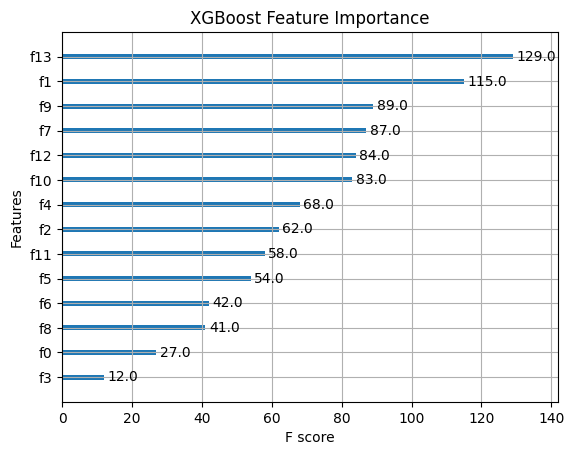

In [11]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(model_xg)
plt.title('XGBoost Feature Importance')
plt.show()


In [ ]:

# # Save the trained model if needed (optional)
# import joblib
# joblib.dump(model, 'water_quality_model.pkl')

# # Predicting on new samples
# new_sample = [[7.0, 1000, 30, 200, 150, 200, 20, 250, 50, 20, 150, 5, 1.0]]  # Example new data
# new_sample_scaled = scaler.transform(new_sample)
# prediction = model.predict(new_sample_scaled)
# print(f'The sample is classified as {"Polluted" if prediction[0] == 1 else "Non-Polluted"}')

In [14]:
import tensorflow as tf

# Preprocessing: Separate features (X) and labels (y)
X = df[['ID','pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F']]  # Features (all columns except target)
y = df['Water_Quality'].map({'Non-Polluted': 0, 'Polluted': 1})  # Binary classification

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KeyboardInterrupt: 

In [17]:
# Define a simple Feed-Forward Neural Network using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),  # First hidden layer
    tf.keras.layers.Dense(32, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss_fnn, accuracy_fnn = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy_fnn * 100:.2f}%')

Epoch 1/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8796 - loss: 0.3008 - val_accuracy: 0.9550 - val_loss: 0.0992
Epoch 2/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9636 - loss: 0.0923 - val_accuracy: 0.9678 - val_loss: 0.0755
Epoch 3/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.0729 - val_accuracy: 0.9715 - val_loss: 0.0641
Epoch 4/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9696 - loss: 0.0693 - val_accuracy: 0.9755 - val_loss: 0.0598
Epoch 5/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9750 - loss: 0.0614 - val_accuracy: 0.9733 - val_loss: 0.0587
Epoch 6/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.0574 - val_accuracy: 0.9765 - val_loss: 0.0526
Epoch 7/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9787 - loss: 0.0532 - val_accuracy: 0.9782 - val_loss: 0.0507
Epoch 8/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9799 - loss: 0.0495 - val_accuracy: 0.

In [19]:
# Generate predictions and print classification report
y_pred = (model.predict(X_test) >= 0.5).astype(int)


127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [20]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       421
           1       0.99      0.99      0.99      3620

    accuracy                           0.99      4041
   macro avg       0.97      0.97      0.97      4041
weighted avg       0.99      0.99      0.99      4041



In [21]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 401   20]
 [  22 3598]]


# 2021 Data 

In [14]:
df_2021_un = pd.read_csv('/kaggle/input/governmnet-unlabeled/2021.csv')
df_2021_lab = pd.read_csv('/kaggle/input/government-labeled/labeled_water_samples_2021.csv')

In [16]:
true_values = df_2021_lab['Water_Quality']
true_values = true_values.map({'Non-Polluted': 0, 'Polluted': 1})

In [17]:
df_2021_un.insert(0,'ID',range(1,len(df_2021_un)+1))

In [18]:
df_2021_lab.insert(0,'ID',range(1,len(df_2021_lab)+1))

In [19]:
X_2021 = df_2021_un[['ID','pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F']]

In [20]:

X_2021 = scaler.transform(X_2021)

In [35]:
X_2021_rnn = X_2021.reshape(X_2021.shape[0], X_2021.shape[1], 1)

In [36]:
predicted_water_q_2021_xg = model_xg.predict(X_2021)
predicted_water_q_2021_ann = model_ann.predict(X_2021)
predicted_water_q_2021_rnn = model_rnn.predict(X_2021_rnn)

284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


# Calclating percision 

In [38]:
predicted_water_q_2021_xg = (predicted_water_q_2021_xg  > 0.5).astype(int)
predicted_water_q_2021_ann = (predicted_water_q_2021_ann  > 0.5).astype(int)
predicted_water_q_2021_rnn = (predicted_water_q_2021_rnn  > 0.5).astype(int)

In [39]:
from sklearn.metrics import precision_score
# Classification Precision
precision1 = precision_score(true_values, predicted_water_q_2021_xg , average='weighted')
precision2 = precision_score(true_values, predicted_water_q_2021_ann , average='weighted')
precision3 = precision_score(true_values, predicted_water_q_2021_rnn , average='weighted')
print(f"Precision Score for XG boost: {precision1}")
print(f"Precision Score for ANN: {precision2}")
print(f"Precision Score for RNN: {precision3}")


Precision Score for XG boost: 0.9974599225395253
Precision Score for ANN: 0.9905958528016344
Precision Score for RNN: 0.9873948657441062


# ANN

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Separate features and target
X = df[['ID','pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F']]  # Features (all columns except target)

y = df['Water_Quality']  # Target variable (Water_Quality)

# Encode target variable if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data (important for ANN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [16]:

# Build the ANN model
model_ann = Sequential()

# Input layer (matching the number of features)
model_ann.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden layers
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dropout(0.3))  # Dropout to reduce overfitting
model_ann.add(Dense(16, activation='relu'))

# Output layer (sigmoid for binary classification)
model_ann.add(Dense(1, activation='sigmoid'))  # Change to softmax for multi-class



/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the model
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [18]:
# Train the model
history = model_ann.fit(X_train_scaled, y_train, 
                    validation_data=(X_test_scaled, y_test), 
                    epochs=50, batch_size=32, verbose=2)



Epoch 1/50
506/506 - 3s - 5ms/step - accuracy: 0.9047 - loss: 0.2231 - val_accuracy: 0.9550 - val_loss: 0.1080
Epoch 2/50
506/506 - 1s - 2ms/step - accuracy: 0.9595 - loss: 0.0969 - val_accuracy: 0.9710 - val_loss: 0.0746
Epoch 3/50
506/506 - 1s - 2ms/step - accuracy: 0.9681 - loss: 0.0772 - val_accuracy: 0.9720 - val_loss: 0.0640
Epoch 4/50
506/506 - 1s - 2ms/step - accuracy: 0.9735 - loss: 0.0652 - val_accuracy: 0.9767 - val_loss: 0.0552
Epoch 5/50
506/506 - 1s - 2ms/step - accuracy: 0.9763 - loss: 0.0580 - val_accuracy: 0.9762 - val_loss: 0.0562
Epoch 6/50
506/506 - 1s - 2ms/step - accuracy: 0.9770 - loss: 0.0540 - val_accuracy: 0.9802 - val_loss: 0.0484
Epoch 7/50
506/506 - 1s - 2ms/step - accuracy: 0.9810 - loss: 0.0451 - val_accuracy: 0.9802 - val_loss: 0.0430
Epoch 8/50
506/506 - 1s - 2ms/step - accuracy: 0.9817 - loss: 0.0432 - val_accuracy: 0.9817 - val_loss: 0.0445
Epoch 9/50
506/506 - 1s - 2ms/step - accuracy: 0.9839 - loss: 0.0404 - val_accuracy: 0.9829 - val_loss: 0.0418
E

In [19]:
# Evaluate the model
loss_ann, accuracy_ann = model_ann.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy_ann * 100:.2f}%")

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9904 - loss: 0.0310
Test Accuracy: 99.08%


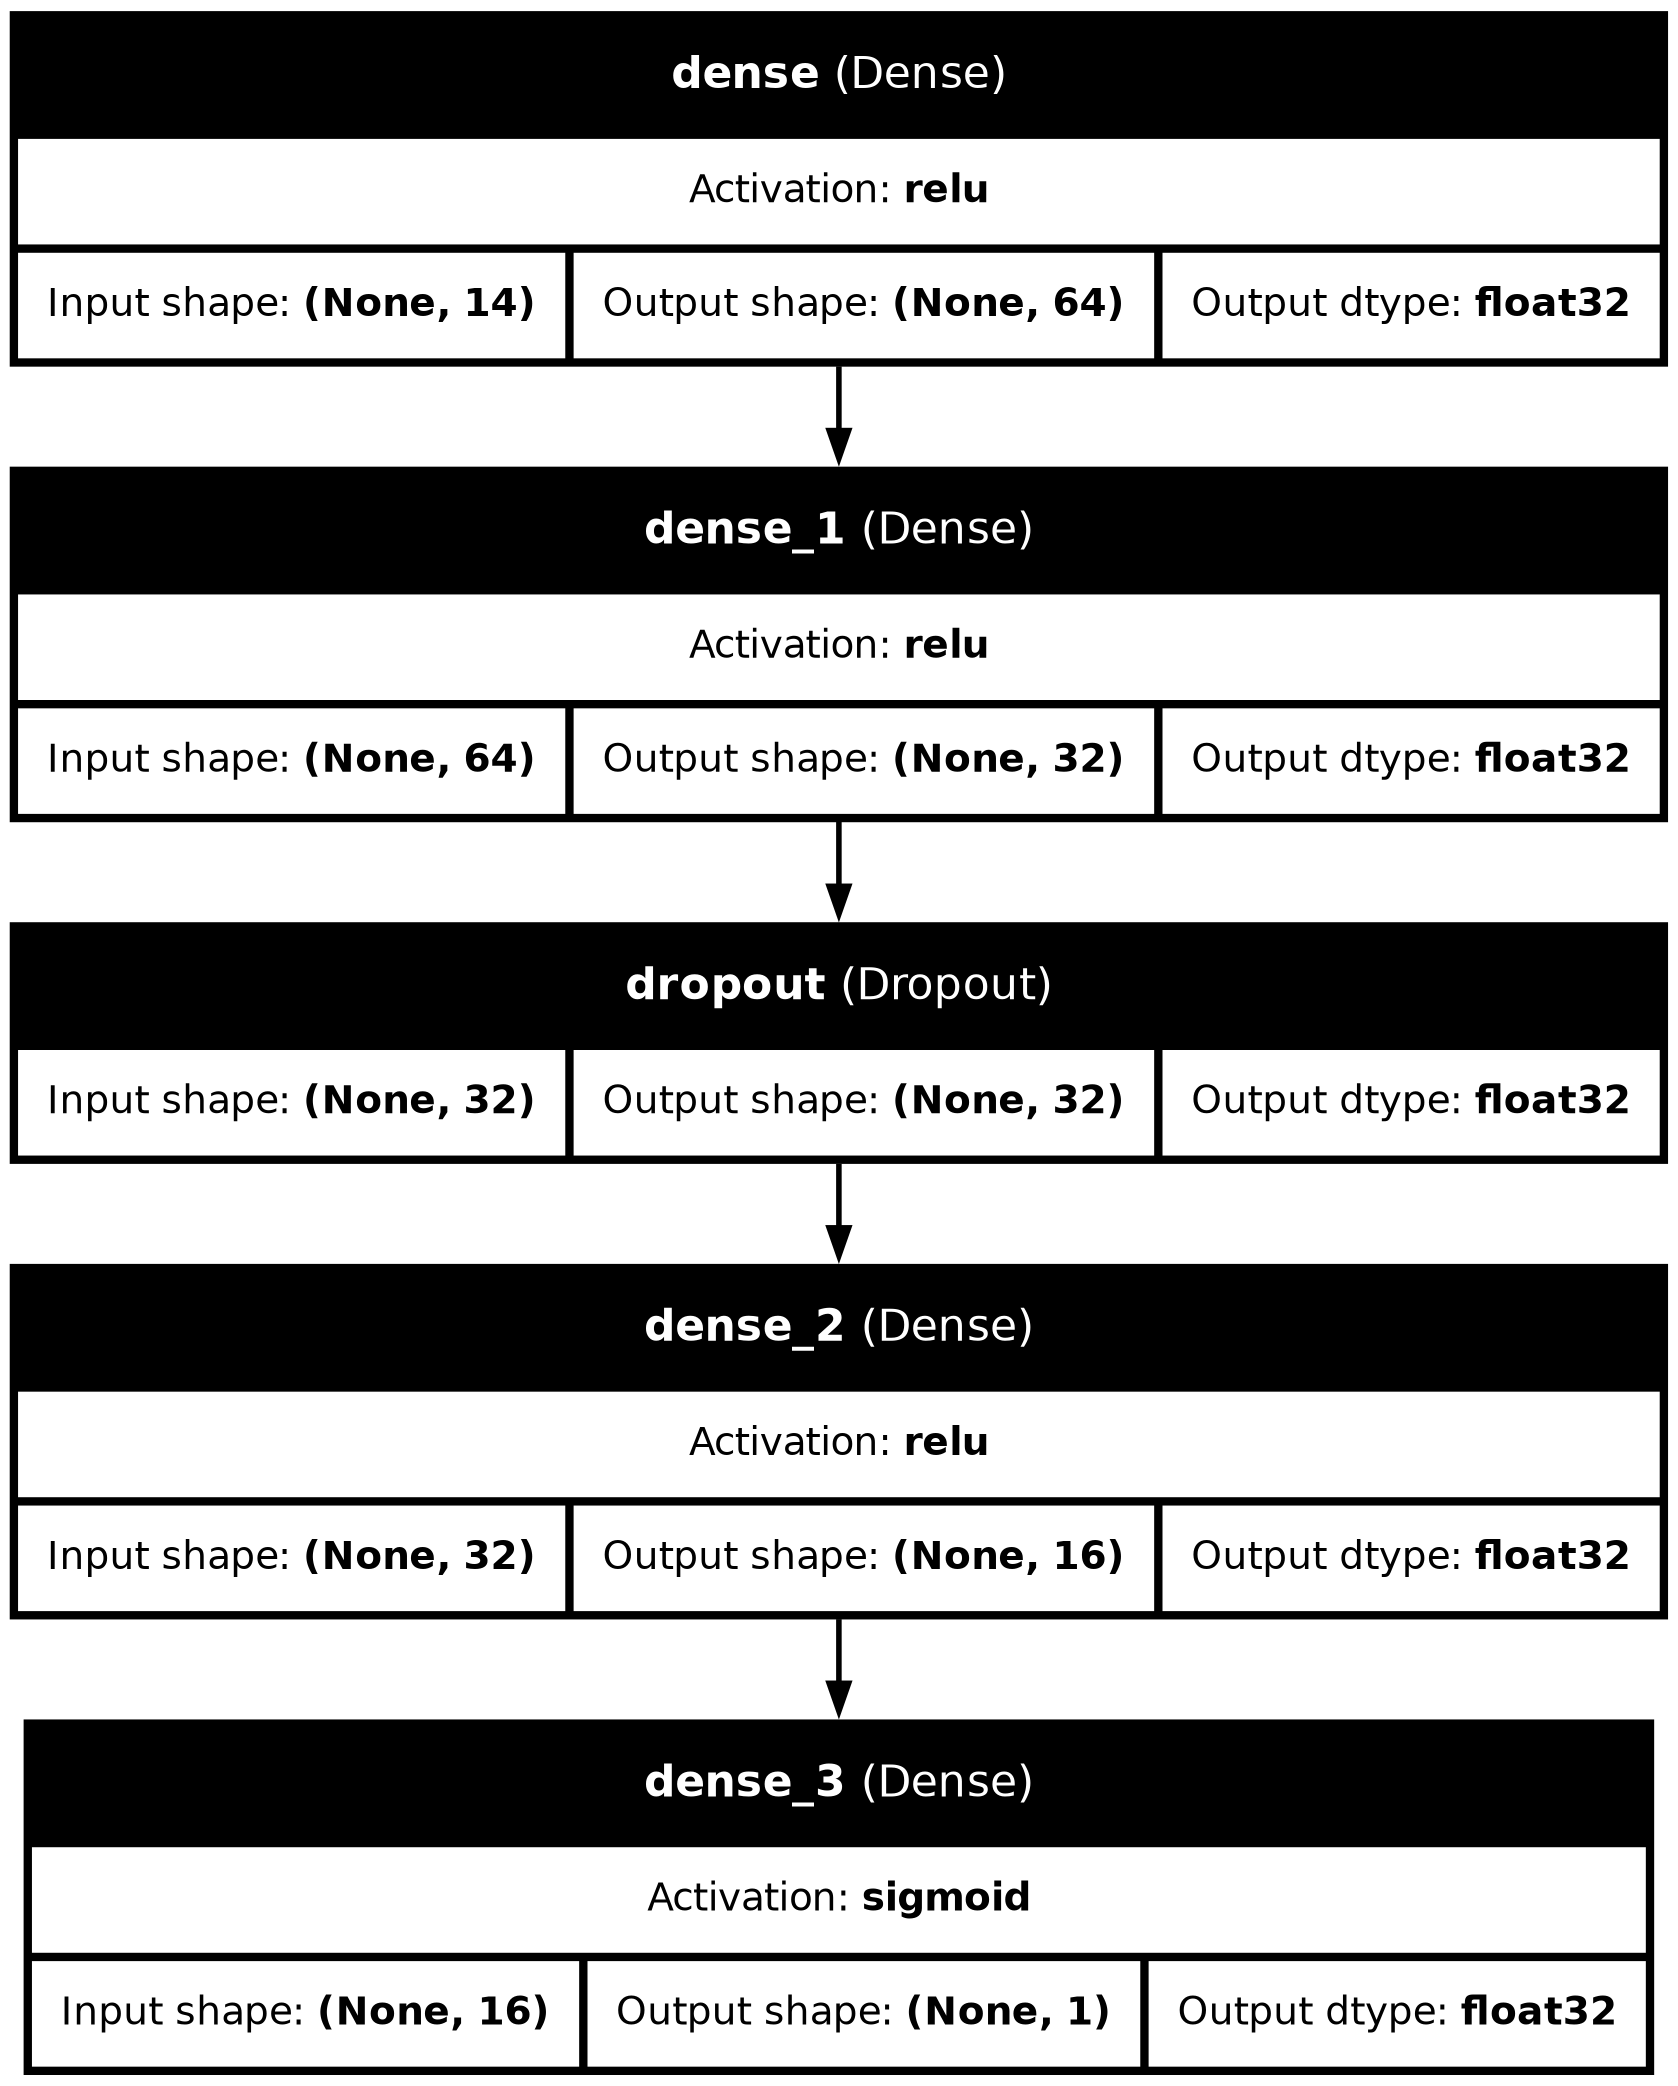

In [26]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model_ann,
    to_file='model_ann.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=200,
    show_layer_activations=True,
    show_trainable=False
)


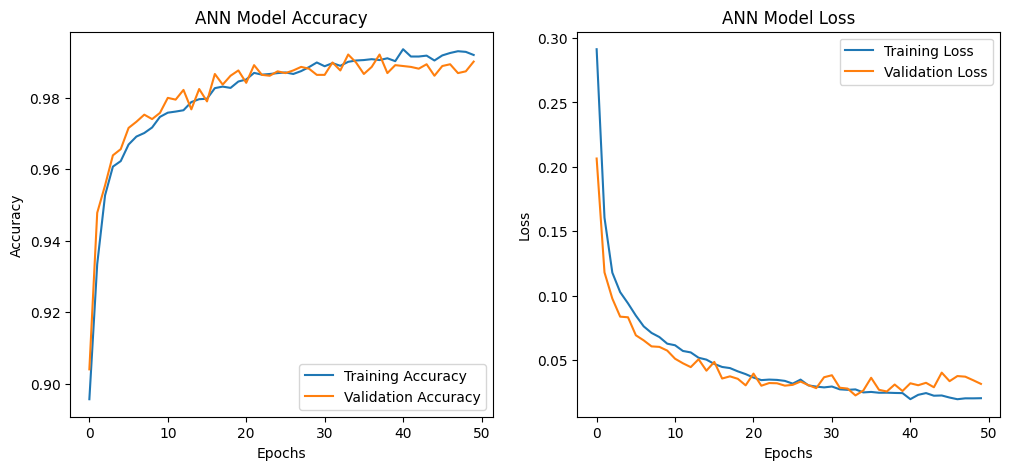

In [29]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ANN Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('ANN Model Loss')

plt.show()


# CNN

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, MaxPooling1D

# Standardize the feature data (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input for CNN (CNN expects 3D input: samples, timesteps, features)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build CNN model
model_cnn = Sequential()

# Add Conv1D layer
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Dropout(0.3))

# Flatten and fully connected layers
model_cnn.add(Flatten())
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(1, activation='sigmoid'))  # For binary classification, use softmax for multi-class

# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_cnn.fit(X_train_cnn, y_train, 
                    validation_data=(X_test_cnn, y_test), 
                    epochs=50, batch_size=32, verbose=2)

# Evaluate the model
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {accuracy_cnn * 100:.2f}%")



Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


506/506 - 3s - 6ms/step - accuracy: 0.8972 - loss: 0.2754 - val_accuracy: 0.8958 - val_loss: 0.2581
Epoch 2/50
506/506 - 2s - 3ms/step - accuracy: 0.8990 - loss: 0.2551 - val_accuracy: 0.8958 - val_loss: 0.2545
Epoch 3/50
506/506 - 2s - 3ms/step - accuracy: 0.8990 - loss: 0.2503 - val_accuracy: 0.8958 - val_loss: 0.2478
Epoch 4/50
506/506 - 2s - 3ms/step - accuracy: 0.8990 - loss: 0.2457 - val_accuracy: 0.8958 - val_loss: 0.2511
Epoch 5/50
506/506 - 2s - 3ms/step - accuracy: 0.8991 - loss: 0.2434 - val_accuracy: 0.8958 - val_loss: 0.2434
Epoch 6/50
506/506 - 2s - 3ms/step - accuracy: 0.8990 - loss: 0.2419 - val_accuracy: 0.8958 - val_loss: 0.2424
Epoch 7/50
506/506 - 2s - 3ms/step - accuracy: 0.8990 - loss: 0.2403 - val_accuracy: 0.8958 - val_loss: 0.2392
Epoch 8/50
506/506 - 2s - 3ms/step - accuracy: 0.8990 - loss: 0.2398 - val_accuracy: 0.8958 - val_loss: 0.2411
Epoch 9/50
506/506 - 2s - 3ms/step - accuracy: 0.8991 - loss: 0.2395 - val_accuracy: 0.8958 - val_loss: 0.2372
Epoch 10/50


# RNN


In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# Separate features and target
X = df[['pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F']]  # Features (all columns except target)
y = df['Water_Quality']  # Target variable (Water_Quality)

# Encode target variable if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input for LSTM (LSTM expects 3D input: samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build LSTM model
model_rnn = Sequential()

# Add LSTM layer
model_rnn.add(LSTM(units=64, return_sequences=False, input_shape=(X_train_lstm.shape[1], 1)))
model_rnn.add(Dropout(0.3))

# Fully connected layers
model_rnn.add(Dense(32, activation='relu'))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(1, activation='sigmoid'))  # For binary classification, use softmax for multi-class

# Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_rnn.fit(X_train_lstm, y_train, 
                    validation_data=(X_test_lstm, y_test), 
                    epochs=50, batch_size=32, verbose=2)

# Evaluate the model
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test_lstm, y_test)
print(f"Test Accuracy: {accuracy_rnn * 100:.2f}%")

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


506/506 - 6s - 12ms/step - accuracy: 0.8956 - loss: 0.2913 - val_accuracy: 0.9040 - val_loss: 0.2065
Epoch 2/50
506/506 - 3s - 7ms/step - accuracy: 0.9334 - loss: 0.1606 - val_accuracy: 0.9478 - val_loss: 0.1181
Epoch 3/50
506/506 - 3s - 7ms/step - accuracy: 0.9527 - loss: 0.1179 - val_accuracy: 0.9555 - val_loss: 0.0978
Epoch 4/50
506/506 - 3s - 7ms/step - accuracy: 0.9607 - loss: 0.1028 - val_accuracy: 0.9639 - val_loss: 0.0838
Epoch 5/50
506/506 - 3s - 7ms/step - accuracy: 0.9623 - loss: 0.0941 - val_accuracy: 0.9656 - val_loss: 0.0833
Epoch 6/50
506/506 - 4s - 7ms/step - accuracy: 0.9669 - loss: 0.0846 - val_accuracy: 0.9715 - val_loss: 0.0693
Epoch 7/50
506/506 - 3s - 7ms/step - accuracy: 0.9691 - loss: 0.0762 - val_accuracy: 0.9733 - val_loss: 0.0653
Epoch 8/50
506/506 - 5s - 10ms/step - accuracy: 0.9701 - loss: 0.0711 - val_accuracy: 0.9753 - val_loss: 0.0607
Epoch 9/50
506/506 - 3s - 7ms/step - accuracy: 0.9717 - loss: 0.0679 - val_accuracy: 0.9740 - val_loss: 0.0603
Epoch 10/5

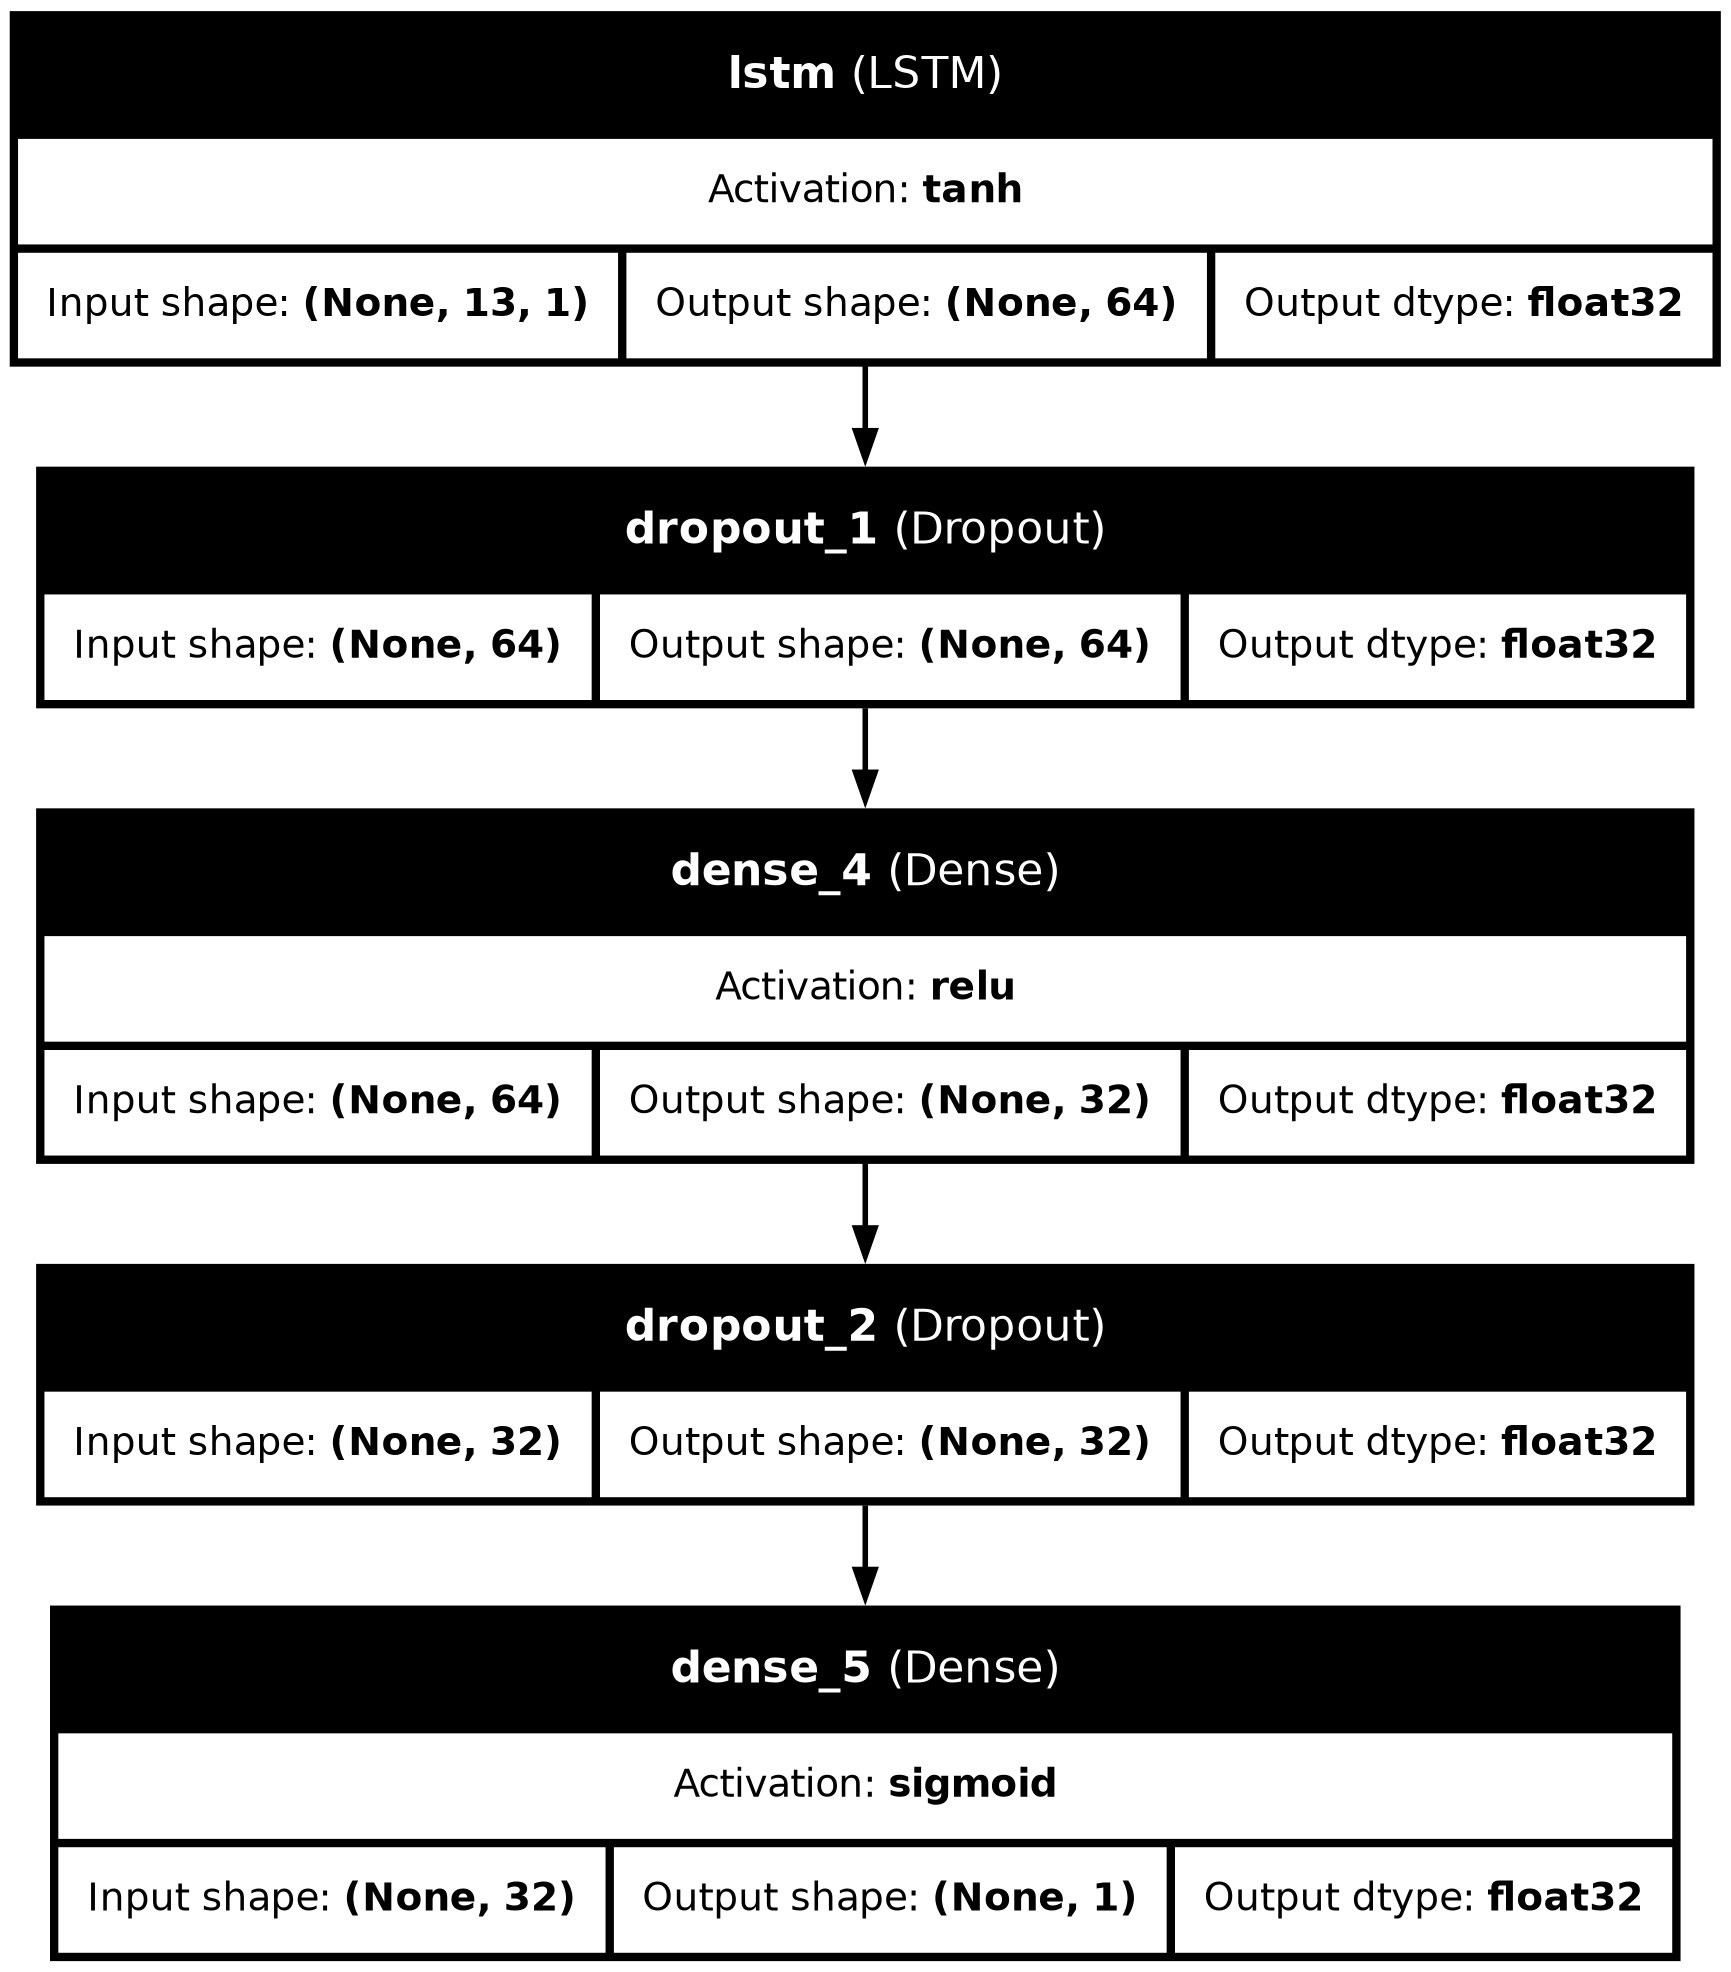

In [28]:
tf.keras.utils.plot_model(
    model_rnn,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
    show_trainable=False
)


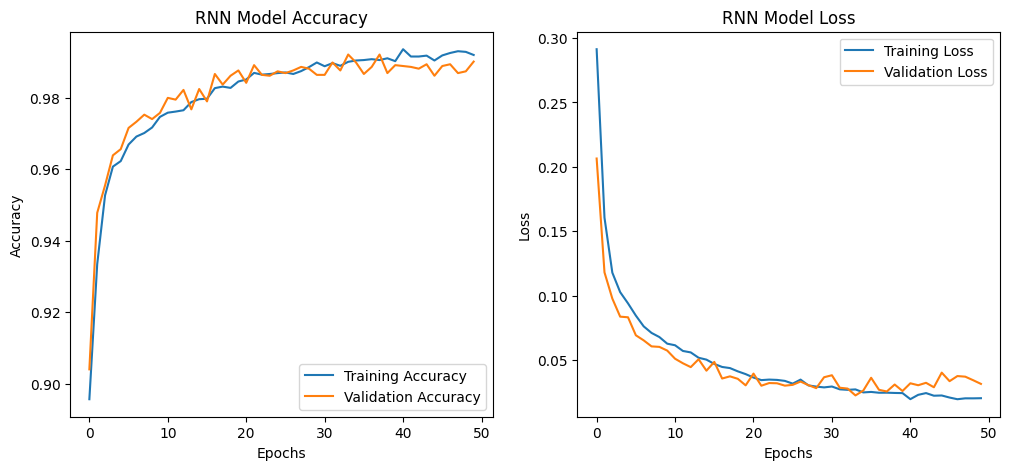

In [30]:
# Assuming the history variable contains the training history for the RNN model

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('RNN Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('RNN Model Loss')

plt.show()


# Comparision & Analysis 

Model Accuracies Table
     Model  Accuracy
0  XGBoost  0.997525
1      ANN  0.991339
2      RNN  0.993318


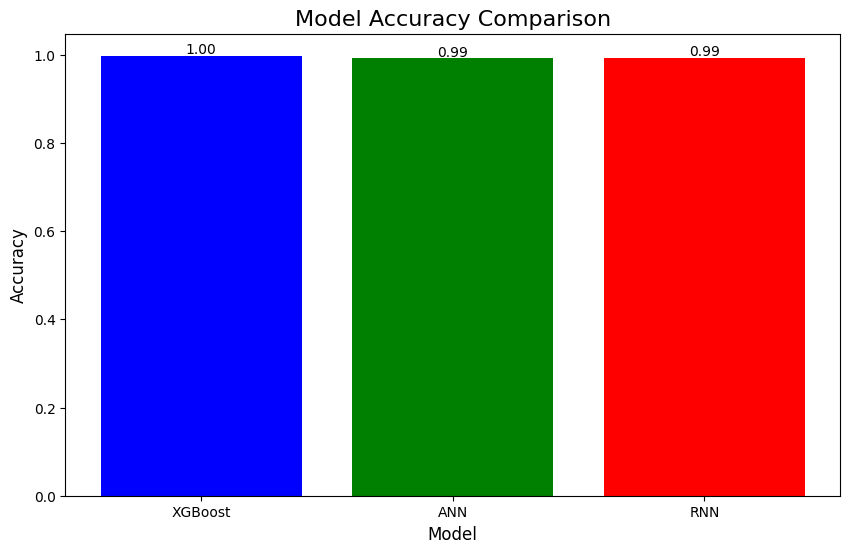

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Accuracies for different models (you already have these variables)
accuracy_xgboost = accuracy_xgboost  # XGBoost accuracy
accuracy_ann = accuracy_ann          # ANN accuracy
accuracy_rnn = accuracy_rnn          # RNN accuracy

# Create a dictionary to store accuracies
accuracy_dict = {
    'Model': ['XGBoost','ANN', 'RNN'],
    'Accuracy': [accuracy_xgboost, accuracy_ann, accuracy_rnn]
}

# Convert the dictionary into a DataFrame for display
accuracy_df = pd.DataFrame(accuracy_dict)

# Display the accuracy table
print("Model Accuracies Table")
print(accuracy_df)

# Plot a bar chart to compare accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color=['blue', 'green', 'red'])

# Add titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Show accuracy values on top of each bar
for i, v in enumerate(accuracy_df['Accuracy']):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center', fontsize=10)

# Show plot
plt.show()


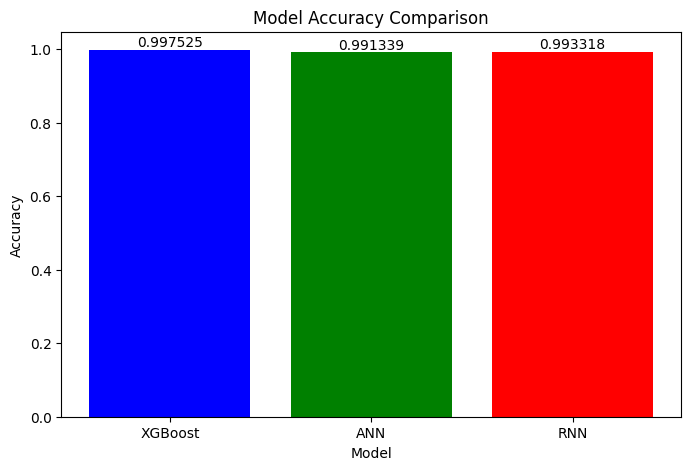

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for models and their accuracies
data = {
    'Model': ['XGBoost', 'ANN', 'RNN'],
    'Accuracy': [0.997525, 0.991339, 0.993318]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(df['Model'], df['Accuracy'], color=['blue', 'green', 'red'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Display the accuracy values on top of the bars
for i, v in enumerate(df['Accuracy']):
    plt.text(i, v + 0.001, f'{v:.6f}', ha='center', va='bottom')

# Show the plot
plt.show()


# Uisng the best performing models to predict for 2021 dataset 


In [55]:
data = pd.read_csv("/kaggle/input/governmnet-unlabeled/2021.csv")
data

,STATE,DISTRICT,Year,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F
0,A&N Islands,South Andaman,2021,7.74,349.0,0.0,183.0,25.0,1.0,1.0,175.0,34.0,22.0,10.0,0.0,0.84
1,A&N Islands,South Andaman,2021,7.53,660.0,0.0,262.0,82.0,5.0,1.0,250.0,52.0,29.0,51.0,1.0,0.28
2,A&N Islands,South Andaman,2021,7.50,270.0,0.0,116.0,35.0,1.0,0.0,125.0,4.0,28.0,10.0,1.0,0.46
3,A&N Islands,South Andaman,2021,7.60,311.0,0.0,159.0,39.0,2.0,0.0,135.0,26.0,17.0,15.0,2.0,0.37
4,A&N Islands,South Andaman,2021,7.82,2501.0,0.0,512.0,560.0,56.0,5.0,465.0,56.0,79.0,336.0,18.0,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9054,West Bengal,South 24 Parganas,2021,8.53,827.0,27.0,256.0,117.0,32.0,6.0,235.0,26.0,41.0,122.0,4.2,0.00
9055,West Bengal,South 24 Parganas,2021,8.48,755.0,30.0,275.0,99.0,0.0,0.0,175.0,24.0,28.0,120.0,3.8,0.00
9056,West Bengal,South 24 Parganas,2021,8.48,856.0,30.0,262.0,131.0,0.0,0.0,170.0,14.0,33.0,135.0,4.6,0.00
9057,West Bengal,South 24 Parganas,2021,8.71,717.0,30.0,275.0,64.0,0.0,0.0,285.0,56.0,35.0,32.0,5.2,0.12


In [56]:
unlabled_data = data[['pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K', 'F']]

In [58]:
unlabeled_data #= unlabeled_data.drop('STATE',axis = 1)

,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F
0,7.74,349.0,0.0,183.0,25.0,1.0,1.0,175.0,34.0,22.0,10.0,0.0,0.84
1,7.53,660.0,0.0,262.0,82.0,5.0,1.0,250.0,52.0,29.0,51.0,1.0,0.28
2,7.50,270.0,0.0,116.0,35.0,1.0,0.0,125.0,4.0,28.0,10.0,1.0,0.46
3,7.60,311.0,0.0,159.0,39.0,2.0,0.0,135.0,26.0,17.0,15.0,2.0,0.37
4,7.82,2501.0,0.0,512.0,560.0,56.0,5.0,465.0,56.0,79.0,336.0,18.0,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9054,8.53,827.0,27.0,256.0,117.0,32.0,6.0,235.0,26.0,41.0,122.0,4.2,0.00
9055,8.48,755.0,30.0,275.0,99.0,0.0,0.0,175.0,24.0,28.0,120.0,3.8,0.00
9056,8.48,856.0,30.0,262.0,131.0,0.0,0.0,170.0,14.0,33.0,135.0,4.6,0.00
9057,8.71,717.0,30.0,275.0,64.0,0.0,0.0,285.0,56.0,35.0,32.0,5.2,0.12
